# OPTIMAL TAX ON BUSINESS

## Load files and packages


In [1]:
using CSV, DataFrames, Statistics, Plots, PrettyTables
include("OCModelE.jl")
include("OCModelE_transition.jl")  # defines compute_FO_transition_path


compute_FO_transition_path (generic function with 2 methods)

## Read CSVs

In [2]:

# Set path and load data
path = "/Users/bhandari/Dropbox/optimal_business_taxation/noncompliance/Approximation Code/anm_git/"
cd(path)
df = CSV.read(path*"grid_results_with_values.csv", DataFrame)

# # run the part below if u want to have just ran a new set of cases
# files = filter(f -> occursin(r"^case_\d+\.\d+_\d+\.\d+\.csv$", f), readdir(path))

# # Read all matching files into a vector of DataFrames
# dfs = [CSV.read(joinpath(path, file), DataFrame) for file in files]

# # Optionally, combine into a single DataFrame (if same structure)
# df= vcat(dfs...)
# CSV.write("grid_results_with_values.csv", df)



Row,τb,τw,r,tr,diffv,diffasset,diffgbc,Rss,Wss,Trss,Frac_bss,Vss,Ass,Css,value
,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64
1,0.235714,0.4,0.0418522,0.672907,0.010111,1.49098e-5,-3.30963e-6,1.04185,1.14429,0.672907,0.22866,-69.2857,13.467,1.76292,-69.3242
2,0.271429,0.4,0.0419437,0.692411,8.39347e-5,2.27842e-5,-5.02588e-6,1.04194,1.14267,0.692411,0.218006,-69.0798,13.5203,1.77289,-69.1552
3,0.2,0.4,0.0417525,0.65273,0.0435448,1.02439e-5,-2.17309e-6,1.04175,1.14606,0.65273,0.239171,-69.5025,13.4137,1.75266,-69.5026
4,0.307143,0.4,0.042027,0.711102,8.49706e-5,1.10089e-5,-2.34168e-6,1.04203,1.14121,0.711102,0.20727,-68.8873,13.5725,1.78242,-68.9971
5,0.342857,0.4,0.0421025,0.728831,0.0104017,1.65708e-5,-3.56852e-6,1.0421,1.13988,0.728831,0.196499,-68.7107,13.6232,1.79136,-68.8519
6,0.378571,0.4,0.0421713,0.745506,0.0131222,2.4985e-5,-5.52313e-6,1.04217,1.13867,0.745506,0.185675,-68.5513,13.6714,1.79961,-68.7208
7,0.414286,0.4,0.0422344,0.761091,0.0153614,3.63731e-5,-8.48456e-6,1.04223,1.13756,0.761091,0.174716,-68.4095,13.7173,1.80713,-68.6039
8,0.45,0.4,0.0422931,0.775551,0.0175515,5.07841e-5,-1.2679e-5,1.04229,1.13653,0.775551,0.163521,-68.2852,13.7611,1.8139,-68.5013
9,0.485714,0.4,0.0423491,0.788816,0.0199373,6.67507e-5,-1.82107e-5,1.04235,1.13556,0.788816,0.15201,-68.1792,13.8032,1.81991,-68.413


In [3]:
df

Row,τb,τw,r,tr,diffv,diffasset,diffgbc,Rss,Wss,Trss,Frac_bss,Vss,Ass,Css,value
,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64
1,0.235714,0.4,0.0418522,0.672907,0.010111,1.49098e-5,-3.30963e-6,1.04185,1.14429,0.672907,0.22866,-69.2857,13.467,1.76292,-69.3242
2,0.271429,0.4,0.0419437,0.692411,8.39347e-5,2.27842e-5,-5.02588e-6,1.04194,1.14267,0.692411,0.218006,-69.0798,13.5203,1.77289,-69.1552
3,0.2,0.4,0.0417525,0.65273,0.0435448,1.02439e-5,-2.17309e-6,1.04175,1.14606,0.65273,0.239171,-69.5025,13.4137,1.75266,-69.5026
4,0.307143,0.4,0.042027,0.711102,8.49706e-5,1.10089e-5,-2.34168e-6,1.04203,1.14121,0.711102,0.20727,-68.8873,13.5725,1.78242,-68.9971
5,0.342857,0.4,0.0421025,0.728831,0.0104017,1.65708e-5,-3.56852e-6,1.0421,1.13988,0.728831,0.196499,-68.7107,13.6232,1.79136,-68.8519
6,0.378571,0.4,0.0421713,0.745506,0.0131222,2.4985e-5,-5.52313e-6,1.04217,1.13867,0.745506,0.185675,-68.5513,13.6714,1.79961,-68.7208
7,0.414286,0.4,0.0422344,0.761091,0.0153614,3.63731e-5,-8.48456e-6,1.04223,1.13756,0.761091,0.174716,-68.4095,13.7173,1.80713,-68.6039
8,0.45,0.4,0.0422931,0.775551,0.0175515,5.07841e-5,-1.2679e-5,1.04229,1.13653,0.775551,0.163521,-68.2852,13.7611,1.8139,-68.5013
9,0.485714,0.4,0.0423491,0.788816,0.0199373,6.67507e-5,-1.82107e-5,1.04235,1.13556,0.788816,0.15201,-68.1792,13.8032,1.81991,-68.413


In [4]:
# df = filter(:value => x -> !isnan(x), df)

# df.ratioV=abs.(df.value./df.Vss .-1)
# # truncate on outliers
# mean(df.ratioV)

# sel= (df.ratioV .<.max(df.ratioV))
# df=df[sel, :]




## Plot optimal $\tau_{b}$

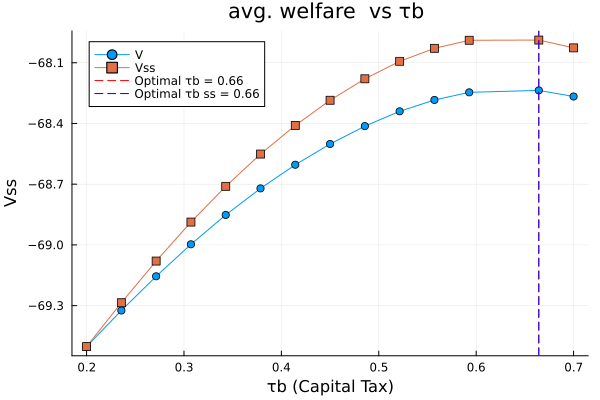

In [5]:

function plot_value_vs_taub(df)
    # Load and clean data
    df_sub = filter(:value => x -> !isnan(x), df)

    sort!(df_sub, :τb)

    # Find τb with maximum value
    idx_max = argmax(df_sub.value)
    best_taub = df_sub[idx_max, :τb]
    best_val = df_sub[idx_max, :value]


    # Find τb with maximum value
    idx_max_ss = argmax(df_sub.Vss)
    best_taub_ss = df_sub[idx_max_ss, :τb]
    best_val_ss = df_sub[idx_max_ss, :Vss]


    # Plot value vs τb and vertical line
    plot(df_sub.τb, df_sub.value,
         marker = :circle, label = "V",
         xlabel = "τb (Capital Tax)", ylabel = "V",
         title = "avg. welfare  vs τb ", grid = true)
        # Plot value vs τb and vertical line
        plot!(df_sub.τb, df_sub.Vss,
        marker = :square, label = "Vss",
        xlabel = "τb (Capital Tax)", ylabel = "Vss",
        title = "avg. welfare  vs τb ", grid = true)
    
    vline!([best_taub], linestyle = :dash, color = :red, label = "Optimal τb = $(round(best_taub, digits=2))")
    vline!([best_taub_ss], linestyle = :dash, color = :blue, label = "Optimal τb ss = $(round(best_taub_ss, digits=2))")

end

# Example usage
plot_value_vs_taub(df)


df_sub = filter(:value => x -> !isnan(x), df)


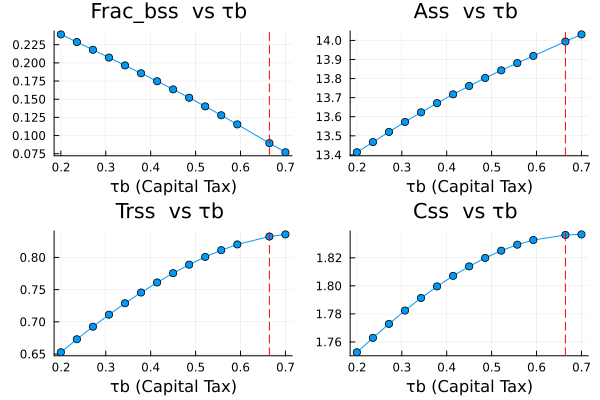

In [6]:

function plot_col_vs_taub(df,col)
    # Load and clean data
    df_sub = filter(:value => x -> !isnan(x), df)

    sort!(df_sub, :τb)

    # Find τb with maximum value
    idx_max = argmax(df_sub.value)
    best_taub = df_sub[idx_max, :τb]
    best_val = df_sub[idx_max, :value]



    # Plot value vs τb and vertical line
    plot(df_sub.τb, df_sub[!,col],
         marker = :circle, label=false,
         xlabel = "τb (Capital Tax)",
         title = "$(col)  vs τb ", grid = true)
    vline!([best_taub], linestyle = :dash, color = :red,label=false)

end

# Example usage
p1=plot_col_vs_taub(df,:Frac_bss)
p2=plot_col_vs_taub(df,:Ass)
p3=plot_col_vs_taub(df,:Trss)
p4=plot_col_vs_taub(df,:Css)
plot(p1,p2,p3,p4)


In [8]:
df_sub = filter(:value => x -> !isnan(x), df)
sort!(df_sub, :τb)
# Find τb with maximum value
idx_max = argmax(df_sub.value)
τb_val = df_sub[idx_max,:τb]
τw_val = df_sub[idx_max,:τw]
df_trans,sol,OCM_,OCM = compute_FO_transition_path(τb_val, τw_val);


setting up the initial ss...
      Using bisection method
      Using newton method
      Interest rate       4.18, Govt transfer       0.65
      Asset market   5.369e-05, Govt budget   -1.192e-05

....done
                    OC Model Results

      Case Parameters
    -------------------------------------------
      τᵇ (Capital tax)           0.20
      τʷ (Labor tax)             0.40
      χ  (max leverage parameter)   2.00

      Equilibrium values and residuals
    -------------------------------------------
      Interest rate             4.18%
      Government transfer       0.65
      Asset market residual     5.37e-05
      Government budget        -1.19e-05


      Incomes (%GDP)            Products             
    -------------------------------------------------
      Sweat            12.2  |  Consumption      69.1
      Compensation     44.3  |  Investment       25.0
      Capital income   43.5  |  Defense           5.9
    ----------------------------------------------

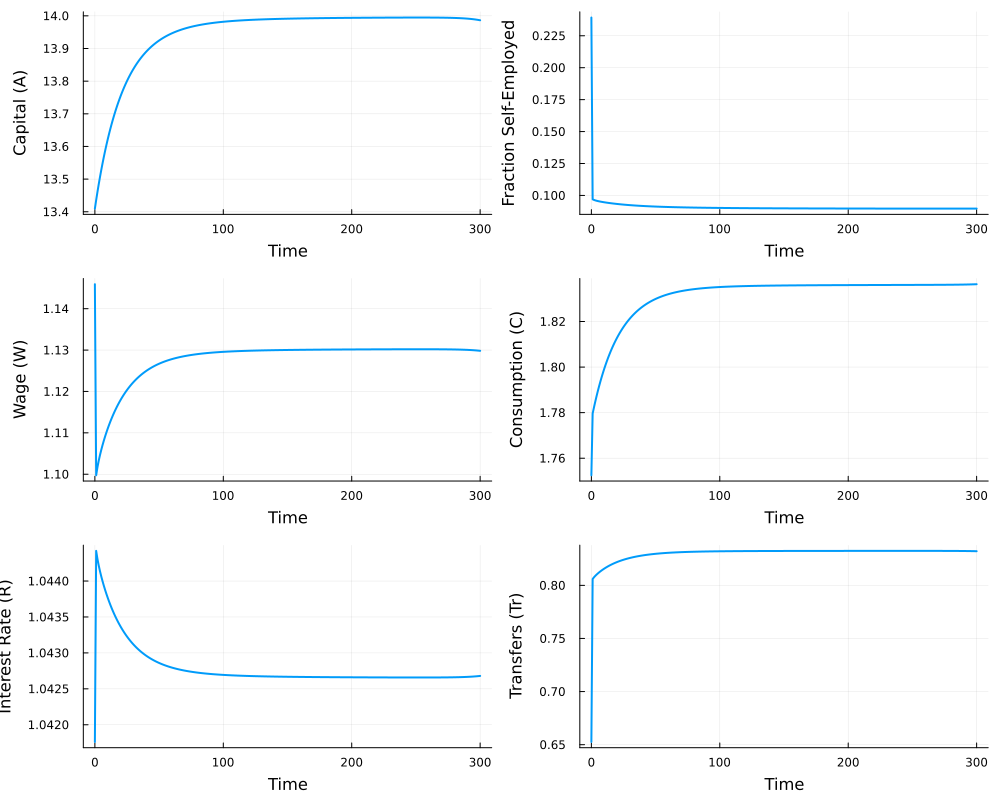

In [10]:


# Set defaults
default(linewidth = 2, size = (1000, 800), legend = :topright)

# Individual plots
p1 = plot(df_trans.t, df_trans.A,       ylabel = "Capital (A)",            xlabel = "Time", label = "")
p2 = plot(df_trans.t, df_trans.Frac_b,  ylabel = "Fraction Self-Employed", xlabel = "Time", label = "")
p3 = plot(df_trans.t, df_trans.W,       ylabel = "Wage (W)",                xlabel = "Time", label = "")
p4 = plot(df_trans.t, df_trans.C,       ylabel = "Consumption (C)",         xlabel = "Time", label = "")
p5 = plot(df_trans.t, df_trans.R,       ylabel = "Interest Rate (R)",       xlabel = "Time", label = "")
p6 = plot(df_trans.t, df_trans.Tr,      ylabel = "Transfers (Tr)",          xlabel = "Time", label = "")

# Combine into 3×2 layout without subplot titles
plot(p1, p2, p3, p4, p5, p6, layout = (3, 2))
